##### Project Description
Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, you will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

The dataset used in this project is the Credit Card Approval dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
df = pd.read_csv('crx.data',header=None)

The first step in any analysis is to obtain the dataset and codebook. Both the dataset and the codebook can be downloaded for free from the UCI website. A quick review of the codebook shows that all of the values in the dataset have been converted to meaningless symbols to protect the confidentiality of the data. This will still suit our purposes as a demonstration dataset since we are not using the data to develop actual credit screening criteria. However, to make it easier to work with the dataset, I gave the variables working names based on the type of data.

Once the dataset is loaded, we’ll use the str() function to quickly understand the type of data in the dataset. This function only shows the first few values for each column so there may be surprises deeper in the data but it’s a good start. Here you can see the names assigned to the variables. The first 15 variables are the credit application attributes. The Approved variable is the credit approval status and target value.

Using the output below, we can see that the outcome values in Approved are ‘+’ or ‘-’ for whether credit had been granted or not. These character symbols aren’t meaningful as is so will need to be transformed. Turning the ‘+’ to a ‘1’ and the ‘-’ to a ‘0’ will help with classification and logistic regression models later in the analysis.

'data.frame':   689 obs. of  16 variables:
 $ Male          : num  1 1 0 0 0 0 1 0 0 0 ...
 $ Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
 $ Debt          : num  4.46 0.5 1.54 5.62 4 ...
 $ Married       : chr  "u" "u" "u" "u" ...
 $ BankCustomer  : chr  "g" "g" "g" "g" ...
 $ EducationLevel: chr  "q" "q" "w" "w" ...
 $ Ethnicity     : chr  "h" "h" "v" "v" ...
 $ YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
 $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
 $ Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
 $ CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
 $ DriversLicense: chr  "f" "f" "t" "f" ...
 $ Citizen       : chr  "g" "g" "g" "s" ...
 $ ZipCode       : chr  "00043" "00280" "00100" "00120" ...
 $ Income        : num  560 824 3 0 0 ...
 $ Approved      : chr  "+" "+" "+" "+" ...

In [2]:
df[9].unique()

array(['t', 'f'], dtype=object)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


##### Data Transformations
As previously mentioned the binary values, such as Approved, need to be converted to 1s and 0s. We’ll need to do additional transformations such as filling in missing values. That process begins by first identifying which values are missing and then determining the best way to address them. We can remove them, zero them out, or estimate a plug value. A scan through the dataset shows that missing values are labeled with ‘?’. For each variable, we’ll convert the missing values to NA which R will interpret differently than a character value.

columns names

In [4]:
#column_names =['gender','age','debt','married','bankcustomer','educationlevel','ethnicity','yearsemployed','priordefault','employed','creditscore','driverslicense','citizen','zipcode','income','approvalstatus' ] 
#df.columns = [column_names]

<AxesSubplot:>

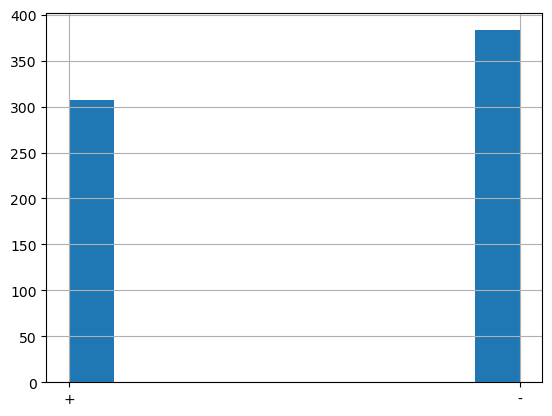

In [5]:
df.iloc[:,15].hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.

In [8]:
df.corr()

,2,7,10,14
2,1.000000,0.298902,0.271207,0.123121
7,0.298902,1.000000,0.322330,0.051345
10,0.271207,0.322330,1.000000,0.063692
14,0.123121,0.051345,0.063692,1.000000


In [9]:
import seaborn as sns

<AxesSubplot:>

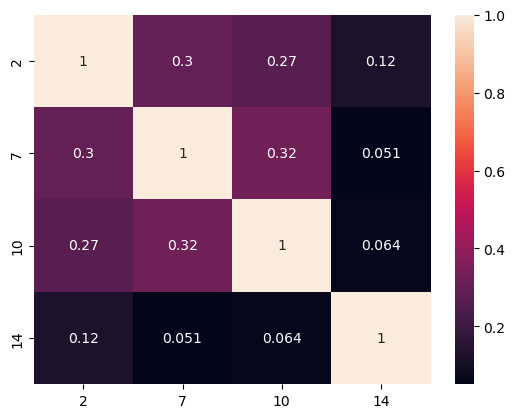

In [10]:
sns.heatmap(df.corr(),annot=True)

drop irrelevant features such as zip code and drivring license
column 11 ,13

In [11]:
df  = df.drop(df.iloc[:,[11,13]],axis=1)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [13]:
from sklearn.model_selection import  train_test_split

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.model_selection import  train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

Now we've split our data, we can handle some of the issues we identified when inspecting the DataFrame, including:

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output of the second task.
Now, let's temporarily replace these missing value question marks with NaN.

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [17]:
import numpy as np
df_train = df_train.replace('?',np.NAN)
df_test = df_test.replace('?',np.NAN)

Impute the NaN values with the mean imputation approach.

For the numeric columns, impute the missing values (NaNs) with pandas method fillna(). Ensure the test set is imputed with the mean values computed from the training set.
Verify if the fillna() method performed as expected by printing the total number of NaNs in each column.


In [18]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_train.mean())

C:\Users\zero\AppData\Local\Temp\ipykernel_10068\3032412339.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train = df_train.fillna(df_train.mean())
C:\Users\zero\AppData\Local\Temp\ipykernel_10068\3032412339.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test = df_test.fillna(df_train.mean())


check for missing values 

In [19]:
print(df_train.isnull().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


In [20]:
# Iterate over each column of cc_apps_train
for col in df_train.columns:
    # Check if the column is of object type
    if df_train[col].dtypes == 'object':
        # Impute with the most frequent value
        df_train = df_train.fillna(df_train[col].value_counts().index[0])
        df_test = df_test.fillna(df_test[col].value_counts().index[0])

. Preprocessing the data (part i)
The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:

Convert the non-numeric data into numeric.
Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the get_dummies() method from pandas.

In [21]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

 Reindex the columns of the test set aligning with the train set


In [22]:
df_test = df_test.reindex(columns=df_train.columns,fill_value=0)

In [23]:
df_train

,2,7,10,14,0_a,0_b,1_13.75,1_15.83,1_15.92,1_16.00,...,6_z,8_f,8_t,9_f,9_t,12_g,12_p,12_s,15_+,15_-
382,2.500,4.500,0,456,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
137,2.750,4.250,6,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
346,1.500,0.250,0,122,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
326,1.085,0.040,0,179,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
33,5.125,5.000,0,4000,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.000,12.500,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
106,1.165,0.500,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
270,0.000,0.000,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
435,0.000,0.000,4,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [24]:
df_train.head()

,2,7,10,14,0_a,0_b,1_13.75,1_15.83,1_15.92,1_16.00,...,6_z,8_f,8_t,9_f,9_t,12_g,12_p,12_s,15_+,15_-
382,2.500,4.50,0,456,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
137,2.750,4.25,6,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
346,1.500,0.25,0,122,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
326,1.085,0.04,0,179,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
33,5.125,5.00,0,4000,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [25]:
# Import MinMaxScaler
# ... YOUR CODE FOR TASK 8 ...
from sklearn.preprocessing import MinMaxScaler
# Segregate features and labels into separate variables
X_train, y_train = df_train.iloc[:,:-2].values, df_train.iloc[:,-2].values
X_test, y_test = df_test.iloc[:,:-2].values, df_test.iloc[:,-2].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

#### Fitting a logistic regression model to the train set
Essentially, predicting if a credit card application will be approved or not is a classification task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

In [26]:
# Import LogisticRegression
# ... YOUR CODE FOR TASK 9 ...
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [32]:
# Import confusion_matrix
# ... YOUR CODE FOR TASK 10 ...
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8508771929824561
[[100  25]
 [  9  94]]


Our model was pretty good! In fact it was able to yield an accuracy score of 100%.

For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.

In [33]:
# Import GridSearchCV
# ... YOUR CODE FOR TASK 11 ...

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [36]:
# Instantiate GridSearchCV with the required parameters
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train,y_train)

# Summarize results
best_score, best_params = grid_model.best_score_, grid_model.best_params_
print("Best: %f using %s" % (best_score,best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ",best_model.score(rescaledX_test, y_test))

Best: 0.867882 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8508771929824561
